# Interface Advection Test 
![Interface advection domain configuration](interfaceAdvection.png)

In this verification study, we consider the advection of the interface using a divergence-free velocity field and report the accuracy of the interface advection near walls. It has been shown in [Fricke et al.](DOI:10.1016/j.physd.2019.01.008) that the contact line advection problem is a well-posed initial value problem if the velocity field is sufficiently regular and tangential to the domain boundary. The interface's motion and the contact angle's evolution can be computed from the velocity field and the initial geometry. Moreover, [Fricke et al.](doi={10.1016/j.jcp.2019.109221}) formulated an ODE system to describe the full evolution of the contact angle $\theta$. Numerical contact angle is calculated by the interface normal $n_{\Sigma}$ and boundary face normal $n_{\partial\Omega}$ as, 

\begin{equation*}
            \theta = \cos^{-1}(\langle - \textbf{n}_{\Sigma}(t, \textbf{x}(t)), \textbf{n}_{\partial\Omega}\rangle).
\end{equation*}


# Contact Angle transport

modules path:  /home/asghar/ma11kuba/OpenFOAM-cases/b01-wetting-benchmark-v2212/AdvectionTest/RefinedMesh/../../modules
{10: {'STM': 'fitParaboloid', 'meshSize': 0.008}, 11: {'STM': 'fitParaboloid', 'meshSize': 0.004}, 12: {'STM': 'fitParaboloid', 'meshSize': 0.002}, 13: {'STM': 'fitParaboloid', 'meshSize': 0.001}, 14: {'STM': 'fitParaboloid', 'meshSize': 0.0005}}
Variant's list:  ['10', '11', '12', '13', '14']
number of cells in x-direction  [125, 250, 500, 1000, 2000]
['/home/asghar/ma11kuba/OpenFOAM-cases/b01-wetting-benchmark-v2212/AdvectionTest/RefinedMesh/test_00010_case/postProcessing/contactangleMax.csv', '/home/asghar/ma11kuba/OpenFOAM-cases/b01-wetting-benchmark-v2212/AdvectionTest/RefinedMesh/test_00011_case/postProcessing/contactangleMax.csv', '/home/asghar/ma11kuba/OpenFOAM-cases/b01-wetting-benchmark-v2212/AdvectionTest/RefinedMesh/test_00012_case/postProcessing/contactangleMax.csv', '/home/asghar/ma11kuba/OpenFOAM-cases/b01-wetting-benchmark-v2212/AdvectionTest/RefinedMe

<Figure size 432x288 with 0 Axes>

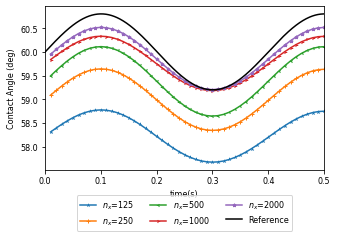

<Figure size 432x288 with 0 Axes>

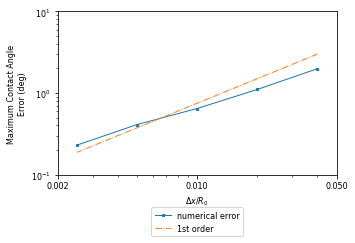

[0.04, 0.02, 0.01, 0.005, 0.0025]
[7.927240565224103e-05, 5.472281890645971e-05, 2.585674276389717e-05, 9.029324269199555e-06, 2.6330229780255704e-06]


<Figure size 432x288 with 0 Axes>

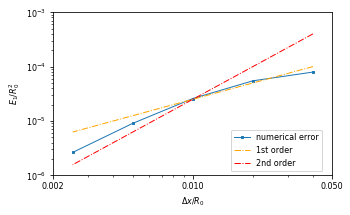

In [1]:
#Loading the necessary files
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
import csv
# for radians
import math
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 600
plt.rcParams['savefig.dpi'] = 600
import itertools
import matplotlib.ticker as mtick

pi =np.pi
sin = np.sin
cos = np.cos
fontSize = 8

sys.path.append(os.path.join(os.getcwd(), '../../modules'))
print('modules path: ', os.path.join(os.getcwd(), '../../modules'))
from advection_funcs import Funcs

surfaceTensionModel = 'fitParaboloid' #surface tension model chosen for the simulations {heightFunction, RDF, fitParaboloid}
dataFolder = '/postProcessing/' #folder with .csv files
dataFile = "contactangleMax.csv"
pattern = "test_"
##############################################################################################################
#File structure

#read the variation-file to get the parameters map that is saved using pyFOAM
var_Map = Funcs.fileMapping(pattern, surfaceTensionModel)
print(var_Map)

nX= [] # number of cells in x direction used for simulations taken from the variation file
stm = [] # surface tension models in all cases,taken from the variation file
var_list = [] # variance number of the parametric study of a specific case


for key, value in var_Map.items():
    stm_map = str(value).split(', ')[0][:-1] #surface tension model map
    stm.append(stm_map.split(': ')[1][1:])
    nx_map = str(value).split(', ')[1][:-1] #nX map
    nX.append(int(1.0/(float(nx_map.split(': ')[1][0:]))))
    var_list.append(str(key)) 
print('Variant\'s list: ', var_list)
print("number of cells in x-direction ", nX)

fileNames = Funcs.fileStructure(dataFolder, dataFile, pattern, var_list )
print(fileNames)

marker = itertools.cycle(('2', '+', '3', '4', '*')) 
labelstr = r"$n_x$"
labels = [labelstr+ "="+str(nx) for nx in nX]

fig = plt.figure()
plt.figure(figsize=(5, 3))

error_inf = np.array([]) #to store max error
for idx, val in enumerate(fileNames):
    t_sim = np.array([])
    ca_sim = np.array([])
    
    df = pd.read_csv(val, index_col = 0)
    
    readfile = open(fileNames[idx], "r")
    for line in readfile:
        t_sim = np.append(t_sim, float(line.split(",")[0]))
        ca_sim = np.append(ca_sim, float(line.split(",")[1]))
    plt.plot(t_sim, ca_sim, label =labels[idx], marker=next(marker), markersize=3.5)
    ca_ref = Funcs.get_ref_contact_angle(t_sim) #Reference contact angles against simulation time for error calculation
    error_inf =np.append( error_inf, Funcs.cal_max_error(ca_sim, ca_ref))

##Refernce solution plot
t = np.arange(0, 0.5 + 0.001, 0.001) # Numerical grid for reference solution
contact_angle = Funcs.get_ref_contact_angle(t)

#plt.title(r'Numerical Contact Angle Evolution', fontsize=fontSize)
plt.xlabel(r"time(s)" ,fontsize=fontSize)
plt.ylabel(r"Contact Angle (deg)",fontsize=fontSize)
plt.xticks(color='black',size = fontSize)
plt.yticks(color='black',size = fontSize)
plt.xlim([0, 0.5])
plt.plot(t, contact_angle, label=r'Reference', color='black')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=3, fontsize=fontSize)
plt.savefig('contact-angle-evolution-refined-mesh'+'.png', bbox_inches='tight')
plt.savefig('contact-angle-evolution-refined-mesh'+'.pdf', bbox_inches='tight')
plt.show()

    
###############################################################################################################

#Maximum error in contact angle transport evolution

fig = plt.figure()
plt.figure(figsize=(5, 3))
R0 = 0.2 #initial radius
x_axis_for_error_plot = [(1/R0/nx) for nx in nX]

x_space = np.linspace (x_axis_for_error_plot[0], x_axis_for_error_plot[-1], 2000)
plt.plot(x_axis_for_error_plot,error_inf , label = "numerical error", marker='s',lw=1, markersize=2.5)
plt.plot(x_space, 75*x_space**1, label="1st order", linestyle ='dashdot', linewidth=1)
#plt.title(r'Contact Angle Evolution Error', fontsize=fontSize)
plt.xlabel(r'$\Delta x / R_0$' ,color='black',fontsize=fontSize)
plt.ylabel(r'Maximum Contact Angle'+'\n' +r'Error (deg)',color='black',fontsize=fontSize)
plt.xticks( color='black',size = fontSize)
plt.yticks(color='black',size = fontSize)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=1, fontsize=fontSize)
plt.loglog()
plt.ylim([1e-1, 1e1])
ax = plt.gca()
ax.set_xticks([2e-3, 1e-2, 5e-2])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.savefig('error-in-contact-angle-evolution-refined-mesh'+'.png', bbox_inches='tight')
plt.savefig('error-in-contact-angle-evolution-refined-mesh'+'.pdf', bbox_inches='tight')
plt.show()

# ###########################################################################################################
# #Geometrical shape Error 

tau = [0, 0.2]
fig = plt.figure()
plt.figure(figsize=(5, 3))

delx = [1.0/x for  x in nX]

def fileStructure():
    alphaDir0 = []
    alphaDir1 = []
    #File structure    
    dataFile = '/alpha.water_glycerol'
    cwd = os.getcwd()
    for idx, id in enumerate(var_list):
        casefolders = [cwd + "/" + folder for folder in os.listdir(cwd) if pattern in folder and var_list[idx] in folder]    
        #datafolders = [df+dataFolder for df in casefolders] 
        casefolders.sort()
        files = [fN +"/" +str(tau[0])+dataFile for fN in casefolders]
        alphaDir0.append(files[0])
        files = [fN +"/" +str(tau[1])+dataFile for fN in casefolders]
        alphaDir1.append(files[0])
    return(alphaDir0, alphaDir1)

alpha0dir = fileStructure()[0] #0 (t=0) alpha directory from all test directories
alpha1dir = fileStructure()[1]  #0.2 (t=\tau) alpha directory from all test directories  

error = 0.0
count = 0
error_arr = []
for ida, alphaDir in enumerate(alpha0dir):  
    alpha0 = Funcs.getAlphaValues (alpha0dir[ida])
    alpha1 = Funcs.getAlphaValues (alpha1dir[ida])
    error = 0.0
    for idx, alpha in enumerate (alpha0):
        error += abs(alpha1[idx] - alpha0[idx]) * delx[count]*delx[count]

    count+=1
    error_arr.append(error/R0**(2))
x_axis_for_error_plot = [x/R0 for x in delx]
print(x_axis_for_error_plot)
print(error_arr)

plt.plot(x_axis_for_error_plot,error_arr, label = "numerical error", marker='s',lw=1, markersize=2.5)
x_space = np.linspace (x_axis_for_error_plot[0], x_axis_for_error_plot[-1], 2000)
plt.plot(x_space, 0.0025*x_space**1, label="1st order", linestyle ='dashdot',color='orange',lw=1)
plt.plot(x_space, 0.25*x_space**2,  label="2nd order", linestyle ='dashdot',color='red',lw=1)
#plt.title(r'Convergence with respect to the discrete $L^1$-norm', fontsize=fontSize)
plt.xlabel(r'$\Delta x / R_0$' ,color='black',fontsize=fontSize)
plt.ylabel(r'$E_1/R_0^2$',color='black',fontsize=fontSize)
plt.xticks( color='black',size = fontSize)
plt.yticks(color='black',size = fontSize)
plt.legend(loc='lower center', bbox_to_anchor=(0.8, 0.0), ncol=1, fontsize=fontSize)
plt.loglog()
plt.ylim([1e-6, 1e-3])
ax = plt.gca()
ax.set_xticks([2e-3, 1e-2, 5e-2])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.savefig('convergence-with-L1-norm-refined-mesh'+'.png', bbox_inches='tight')
plt.savefig('convergence-with-L1-norm-refined-mesh'+'.pdf', bbox_inches='tight')
plt.show()